# Importing Libraries
## PorterStemmer
Stemming algorithm.

In [34]:
import os
import re
import json
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

# Assigning path of dataset

In [35]:
myPath = "/home/raycatcher/Desktop/IR_InvertedIndex/Cars"

# Parser 
Returns dictionaries; documents and year_count.
#### documents: 
{documentId:{"text":text.concatenate(favorite),"file_name":chosenFile_to_parse}}
#### year_count:
{doc_year:Number_of_documents}

In [81]:
def xml_parser(myPath = "/home/raycatcher/Desktop/IR_InvertedIndex/Cars"):
    documents = {}
    documentId=1
    file_count = 0
    year_count = {2007:0,2008:0,2009:0}
    p = re.compile('<text>.*</text>',re.IGNORECASE)
    p2 = re.compile('<favorite>.*</favorite>',re.IGNORECASE)
    for (dirpath, dirnames, filenames) in os.walk(myPath):
        file_count+=len(filenames)
        for chosen_file in filenames:
            my_file = open(dirpath+'/'+chosen_file,'r',encoding='windows-1252')
            my_file = my_file.read()
            all_documents1 = p.findall(my_file.lower())
            all_documents2 = p2.findall(my_file.lower())
            for i in range(len(all_documents1)-1):
                all_documents1[i] = all_documents1[i].replace('<text>','')
                all_documents1[i] = all_documents1[i].replace('</text>','')
                all_documents2[i] = all_documents2[i].replace('<favorite>','')
                all_documents2[i] = all_documents2[i].replace('</favorite>','')
            if chosen_file.split('_')[0] == '2007':
                year_count[2007]+=len(all_documents1)
            if chosen_file.split('_')[0] == '2008':
                year_count[2008]+=len(all_documents1)
            if chosen_file.split('_')[0] == '2009':
                year_count[2009]+=len(all_documents1)
            why = chosen_file

            for i in range(len(all_documents1)-1):
                whole = all_documents1[i]+all_documents2[i]
                documents[documentId] = {"text":whole,"file_name":chosen_file}
                documentId+=1
    return documents, year_count

# Preprocessing
prints out number of tokens before and after performing the steps Mentioned below.
returns dictionary; finished_dic.
finished_dic:
{documentId:{"text":preprocessed(text.concatenate(favorite))},"file_name":chosenFile_to_parse}}
## Tokenizing
## Removing stopwords
## Stemming

In [37]:
def preprocessing(documents):
    tokenizing = [re.findall('\w+',documents[documentId]["text"]) for documentId in documents]

    token_length = 0
    for doc in tokenizing:
        token_length+=len(doc)
    print(f'Number of tokens before preprocessing: {token_length}')

    stop_words = open("/home/raycatcher/Desktop/IR_InvertedIndex/stopwords.txt",'r',encoding='windows-1252')
    stop_words = stop_words.read()
    stop_words = stop_words.split()
    stopWords_removed = []
    stems = []
    finished_dic = {} 
    for doc in tokenizing:
        doc = [d for d in doc if d not in stop_words]
        stopWords_removed.append(doc)
    
    stopWord_length = 0
    for doc in stopWords_removed:
        stopWord_length += len(doc)
    print(f'Number of tokens after removing stop words: {stopWord_length}')

    porter = PorterStemmer()
    for doc in stopWords_removed:
        doc = [porter.stem(s) for s in doc]
        stems.append(doc)
    
    stem_length = 0
    for doc in stems:
        stem_length+=len(doc)
    print(f'Number of tokens after stemming: {stem_length}')

    for documentId in documents:
        finished_dic[documentId] = {"text":' '.join(stems[documentId-1]),"file_name":documents[documentId]["file_name"]}

    return finished_dic

# Create inverted index
returns dictionary inverted_index.
#### Inverted_index:
word : {'doc_id' : documentId_list, 'token_id' : token_id, 'tf' : term_frequency}

In [72]:
def create_index(documents):
    inverted_index={}
    token_id = 1
    for documentId, text in documents.items():
        for word in text['text'].lower().split():
            if inverted_index.get(word,False):
                inverted_index[word]['tf']+=1
                if documentId not in inverted_index[word]['doc_id']:
                    inverted_index[word]['doc_id'].append(documentId)
            else:
                inverted_index[word]={'doc_id':[documentId], 'token_id':token_id, 'tf':1}
                token_id+=1
                
    return inverted_index

# Parsing dataset

In [82]:
documents, years_count = xml_parser(myPath)

# Information about tokens

In [83]:
preprocessed = preprocessing(documents)

Number of tokens before preprocessing: 4544161
Number of tokens after removing stop words: 2099590
Number of tokens after stemming: 2099590


# Printing number of documents

In [84]:
doc_count = len(preprocessed)
print(f'Number of preprocessed documents: {doc_count}')

Number of preprocessed documents: 41131


# Printing number of distinct cars

In [85]:
cars = []
for file_name in range(1,len(preprocessed)-1):
    cars.append(preprocessed[file_name]["file_name"])

distinct_cars = []
for car in cars:
    if car.split('_')[1] not in distinct_cars:
        distinct_cars.append(car.split('_')[1])

print(f'Number of distinct cars: {len(distinct_cars)}\n{distinct_cars}')

Number of distinct cars: 30
['infiniti', 'acura', 'volkswagen', 'nissan', 'audi', 'dodge', 'toyota', 'chevrolet', 'mazda', 'jeep', 'subaru', 'gmc', 'cadillac', 'ford', 'mitsubishi', 'hyundai', 'bmw', 'smart', 'chrysler', 'pontiac', 'lexus', 'mercedes-benz', 'mini', 'saturn', 'honda', 'suzuki', 'scion', 'volvo', 'kia', 'buick']


# Printing number of cars for every year

In [86]:
year_count = {}
for docId in preprocessed:
    if preprocessed[docId]["file_name"].split('_')[0]=='2007':
        if 2007 in year_count:
            year_count[2007]+=1
        else:
            year_count[2007]=1
    if preprocessed[docId]["file_name"].split('_')[0]=='2008':
        if 2008 in year_count:
            year_count[2008]+=1
        else:
            year_count[2008]=1
    if preprocessed[docId]["file_name"].split('_')[0]=='2009':
        if 2009 in year_count:
            year_count[2009]+=1
        else: 
            year_count[2009]=1

print(f'Number of cars for every year: {year_count}')

Number of cars for every year: {2009: 7803, 2007: 18662, 2008: 14666}


# Printing number of documents for every year

In [87]:
print(f'Number of documents for every year: {years_count}')

Number of documents for every year: {2007: 18888, 2008: 14893, 2009: 7946}


# Printing number of words in inverted-index

In [88]:
inverted_index = create_index(preprocessed)
print(f'Number of words in inverted-index: {len(inverted_index)}')

Number of words in inverted-index: 25223


# Information about posting lists

In [89]:
#maximum of posting list lengths
max = -1000000000000000
for word in inverted_index:
    if len(inverted_index[word]['doc_id']) > max:
        max = len(inverted_index[word]['doc_id'])
print(f'Maximum of posting list lengths: {max}')
#minimum o posting list lengths
min = 10000000000000000
for word in inverted_index:
    if len(inverted_index[word]['doc_id']) < min:
        min = len(inverted_index[word]['doc_id'])
print(f'Maximum of posting list lengths: {min}')
#average of posting list lenghts 
ii_length = len(inverted_index)
sum = 0
for word in inverted_index:
    sum+=len(inverted_index[word]['doc_id'])
average = sum/ii_length
print(f'Average of posting list lenghts: {average}')

Maximum of posting list lengths: 26966
Maximum of posting list lengths: 1
Average of posting list lenghts: 71.04349205090593


# Sorting document frequency and term frequency
Sorting document frequency based on frequency list length and sorting term frequency based on integer value for word.

In [90]:
sorted_df = {}
max = -1000000000000000
for loop in range(20):
    for word in inverted_index:
        if word in sorted_df:
            continue
        if inverted_index[word]['tf'] > max:
            top = word
            max = inverted_index[word]['tf']
    sorted_df[top] = max
    max = -1000000000000000

sorted_tf = {}
max = -1000000000000000
for loop in range(20):
    for word in inverted_index:
        if word in sorted_tf:
            continue
        if len(inverted_index[word]['doc_id']) > max:
            top = word
            max = len(inverted_index[word]['doc_id'])
    sorted_tf[top] = max
    max = -1000000000000000

print(sorted_df)
print(sorted_tf)

{'car': 61938, 'drive': 34871, 'great': 28337, 'seat': 24685, 'love': 20313, 'comfort': 17325, 'interior': 16216, 'ride': 15766, 'good': 15079, 'power': 14457, 'handl': 14438, 'vehicl': 14418, 'mileag': 14001, 'ga': 13964, 'mpg': 13188, 'mile': 11790, 'system': 11068, 'engin': 10719, 'back': 10240, 'fun': 9844}
{'car': 26966, 'drive': 22464, 'great': 18223, 'seat': 16269, 'love': 14340, 'comfort': 13578, 'interior': 12600, 'ride': 12184, 'handl': 11436, 'mileag': 11085, 'good': 11065, 'power': 10894, 'ga': 10734, 'vehicl': 9840, 'mpg': 9314, 'mile': 9302, 'engin': 8372, 'system': 8328, 'back': 8214, 'fun': 8207}


# Top 20 word and their document frequency

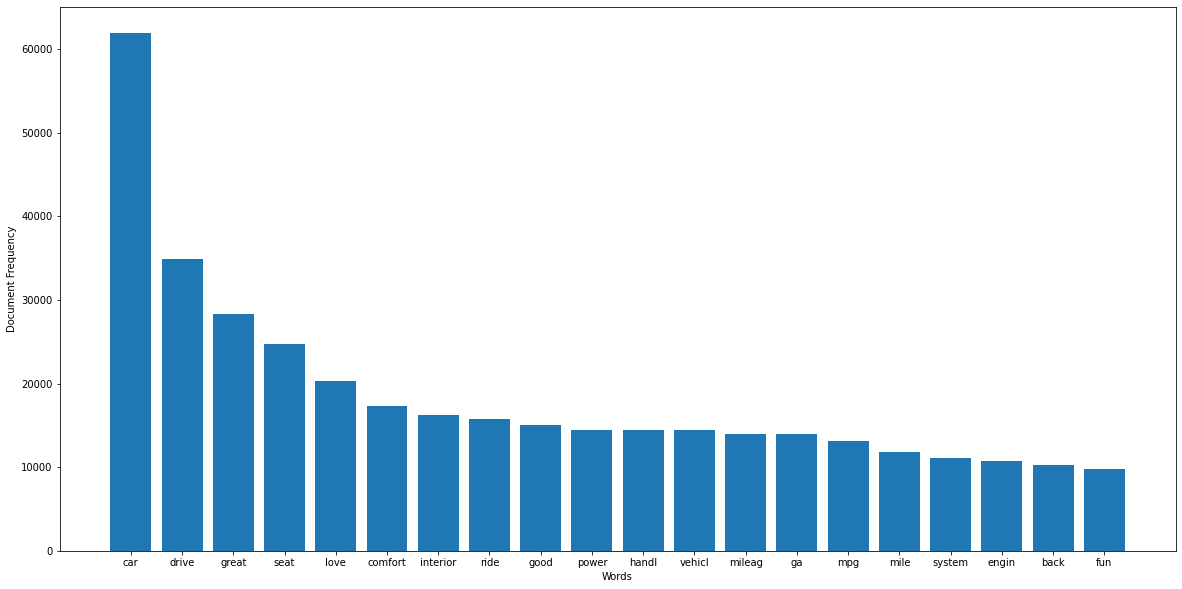

In [91]:
x = [word for word in sorted_df]
y = [sorted_df[frq] for frq in sorted_df]
plt.figure(figsize=(20, 10))
plt.xlabel('Words')
plt.ylabel('Document Frequency')
plt.bar(x,y)
plt.show()

# Top 20 word and their term frequency

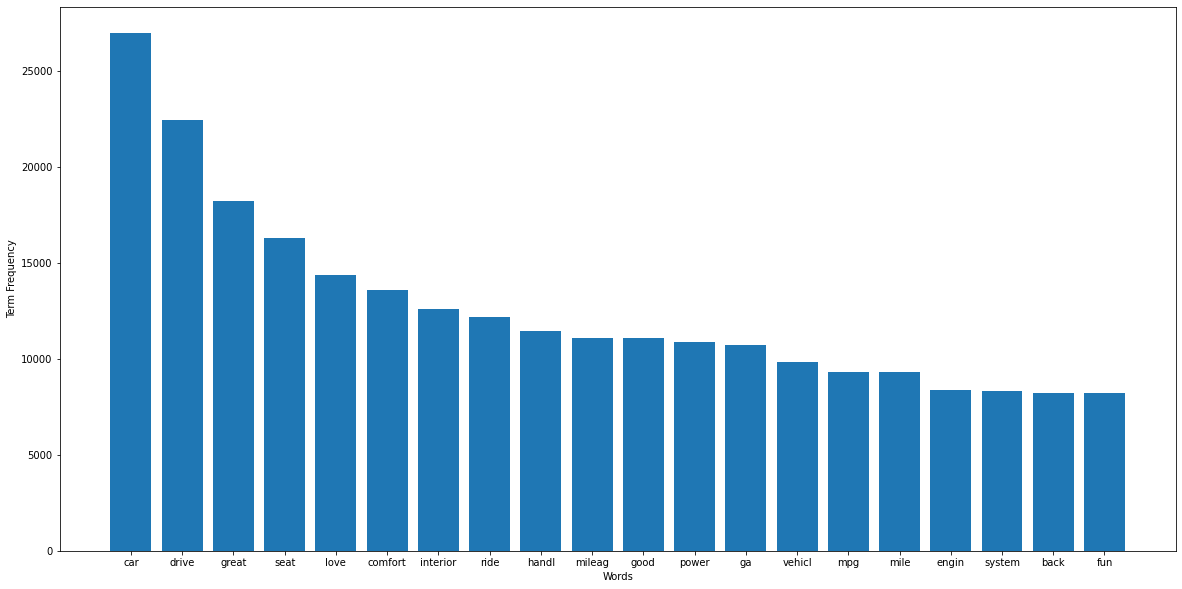

In [92]:
x = [word for word in sorted_tf]
y = [sorted_tf[frq] for frq in sorted_tf]
plt.figure(figsize=(20, 10))
plt.xlabel('Words')
plt.ylabel('Term Frequency')
plt.bar(x,y)
plt.show()

# Files

In [101]:
df_file = open('df_file.txt','w')
for word in inverted_index:
    df_file.write(word+' '+str(len(inverted_index[word]['doc_id']))+' '+str(inverted_index[word]['token_id'])+'\n')
df_file.close()

In [105]:
tf_file = open('tf_file.txt','w')
for word in inverted_index:
    for document in inverted_index[word]['doc_id']:
        tf = re.findall(word,documents[document]['text'])
        tf_file.write(word+' '+str(document)+' '+str(len(tf))+'\n')